In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn import datasets
from sklearn import linear_model

from sklearn import metrics

%matplotlib inline

In [2]:
iris = datasets.load_iris()


### Recognizing Digits

In [3]:
digits = datasets.load_digits()
n_samples = digits.data.shape[0]
print digits.data.shape

(1797, 64)


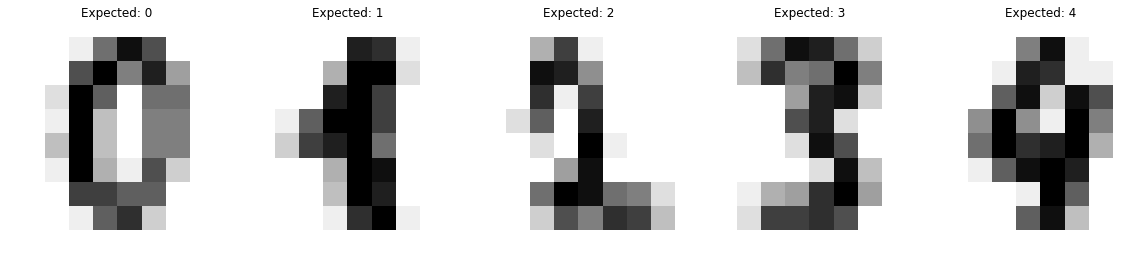

In [4]:
def plot_images(images, expected=None, predicted=None):
    f = plt.figure(figsize=(20,4))
    axs = f.subplots(nrows=1, ncols=len(images))
    for k in range(len(images)):
        ax = axs[k]
        ax.set_axis_off()
        ax.imshow(images[k], plt.cm.gray_r, interpolation='nearest')
        title = ""
        if expected is not None:
            title += "Expected: %d\n" % expected[k]
        if predicted is not None:
            title += "Predicted: %d\n" % predicted[k]
        ax.set_title(title)

plot_images(digits.images[10:15], digits.target[10:15])
                   

                   

In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [6]:
clf.fit(digits.data[:n_samples / 2], digits.target[:n_samples/2])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
test_digits = digits.images[n_samples/2:]
test_data = digits.data[n_samples/2:]
expected = digits.target[n_samples/2:]
predicted = clf.predict(test_data)

df = pd.DataFrame({
    "predicted": predicted,
    "expected": expected
})
df["correct"] = df["predicted"] == df["expected"]
print df.head(20)
print float(df["correct"].sum()) / len(df)

    expected  predicted  correct
0          8          8     True
1          8          8     True
2          4          4     True
3          9          9     True
4          0          0     True
5          8          8     True
6          9          9     True
7          8          8     True
8          1          1     True
9          2          2     True
10         3          3     True
11         4          4     True
12         5          5     True
13         6          6     True
14         7          7     True
15         8          8     True
16         9          9     True
17         0          0     True
18         1          1     True
19         2          2     True
0.969966629588


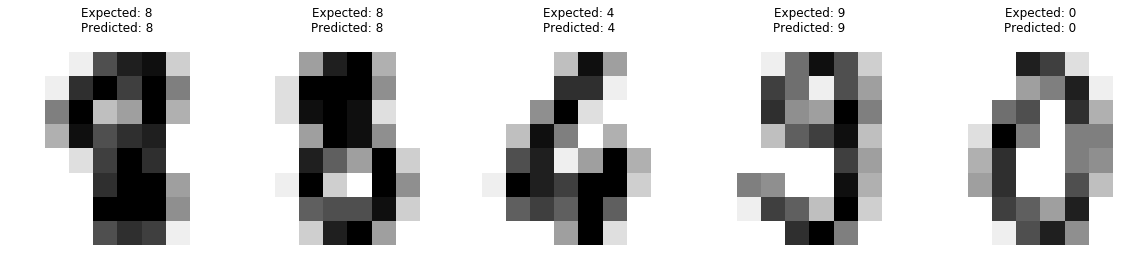

In [8]:
plot_images(test_digits[:5], expected[:5], predicted[:5])


In [9]:
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.96      0.97        91
          2       0.99      0.99      0.99        86
          3       0.98      0.90      0.94        91
          4       0.99      0.96      0.97        92
          5       0.95      0.96      0.95        91
          6       0.99      0.99      0.99        91
          7       0.98      0.99      0.98        89
          8       0.94      1.00      0.97        88
          9       0.92      0.98      0.95        92

avg / total       0.97      0.97      0.97       899



In [10]:
print metrics.confusion_matrix(expected, predicted)

[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


### Diabetes dataset
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity

In [11]:
diabetes = datasets.load_diabetes()

In [12]:
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
features = data.columns
data['y'] = diabetes.target
#data = pd.concat([diabetes.data, diabetes.target], axis='columns')
print data.shape

ix = np.random.permutation(np.arange(len(data)))
data_train = data.loc[ix[:400]]
data_test = data.loc[ix[400:]]

(442, 11)


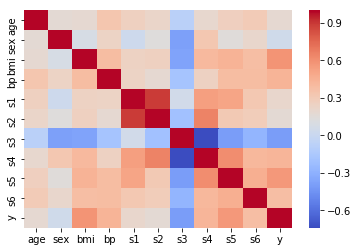

In [13]:
sns.heatmap(data.corr(), cmap=plt.cm.coolwarm)


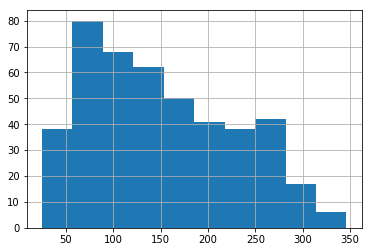

In [14]:
data['y'].hist()

In [15]:
def compute_mse(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

def compute_R2(y_true, y_predicted):
    return 1. - compute_mse(y_true, y_predicted) / ((y_true - y_true.mean())**2).mean()


In [16]:
expected = data_test['y']
predicted0 = data_train['y'].mean()
print "Baseline (mean):"
print "MSE:", compute_mse(expected, predicted0)
print "R2 :", compute_R2(expected, predicted0)

Baseline (mean):
MSE: 5514.51225625
R2 : -0.0136556984243


In [17]:
reg = linear_model.LinearRegression()
reg.fit(data_train[features], data_train['y'])
predicted1 = reg.predict(data_test[features])
print "linear_reg"
print "MSE:", compute_mse(expected, predicted1)
print "R2 :", compute_R2(expected, predicted1)

linear_reg
MSE: 3115.33296338
R2 : 0.427351891866


ridge (with holdout)
MSE:3062.83
R2 : 0.4370
[ -27.32490101 -239.93621438  541.18061233  300.34390638 -214.82646997
  -15.09288298 -130.85204584  153.53133427  508.68935582   89.33915311]


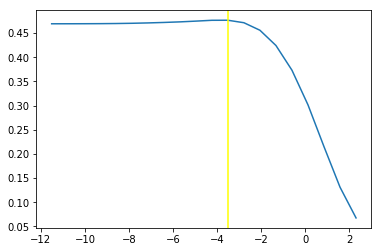

In [18]:
reg = linear_model.Ridge()
alphas = np.logspace(-5, 1, 20)
scores = [reg.set_params(alpha=alpha).fit(data_train.loc[:300, features], data_train.loc[:300, 'y']).score(data_train.loc[300:, features], data_train.loc[300:, 'y']) for alpha in alphas]
alpha_0 = alphas[np.argmax(scores)]
plt.plot(np.log(alphas), scores)
plt.axvline(np.log(alpha_0), color='yellow')
#print zip(alphas, scores)
reg.set_params(alpha=alpha_0).fit(data_train.loc[:, features], data_train.loc[:, 'y'])
predicted2 = reg.predict(data_test[features])
print "ridge (with holdout)"
print "MSE:%.2f" % compute_mse(expected, predicted2)
print "R2 : %.4f" % compute_R2(expected, predicted2)
print reg.coef_

lasso (with holdout)
MSE:3030.27
R2 : 0.4430
[ -12.30038909 -225.61273489  553.56670096  289.04620947 -207.05508396
   -0.         -138.45302228  111.94550588  528.55966774   70.88974898]


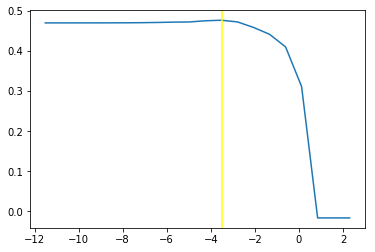

In [19]:
reg = linear_model.Lasso()
alphas = np.logspace(-5, 1, 20)
scores = [reg.set_params(alpha=alpha).fit(data_train.loc[:300, features], data_train.loc[:300, 'y']).score(data_train.loc[300:, features], data_train.loc[300:, 'y']) for alpha in alphas]
alpha_0 = alphas[np.argmax(scores)]
plt.plot(np.log(alphas), scores)
plt.axvline(np.log(alpha_0), color='yellow')
#print zip(alphas, scores)
reg.set_params(alpha=alpha_0).fit(data_train.loc[:, features], data_train.loc[:, 'y'])
predicted3 = reg.predict(data_test[features])
print "lasso (with holdout)"
print "MSE:%.2f" % compute_mse(expected, predicted3)
print "R2 : %.4f" % compute_R2(expected, predicted3)
print reg.coef_

### Exercise

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

In [42]:
from sklearn import datasets
from sklearn import linear_model, neighbors
from sklearn import model_selection
from sklearn import metrics

In [75]:
digits = datasets.load_digits()

In [76]:
X_train, X_test, y_train, y_test, digits_train, digits_test = model_selection.train_test_split(digits.data, digits.target, digits.images, test_size=0.1, shuffle=False)

In [60]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(1617, 64)
(1617,)
(180, 64)
(180,)


4
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  1 16  0  1  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  1  0  0  0  0  0  0 16  0]
 [ 0  0  0  1  0  1  0  0  0 16]]
0.972222222222
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.95      1.00      0.97        19
          2       0.94      1.00      0.97        17
          3       0.94      0.89      0.91        18
          4       1.00      1.00      1.00        20
          5       0.90      1.00      0.95        18
          6       1.00      1.00      1.00        18
          7       1.00      1.00      1.00        19
          8       1.00      0.94      0.97        17
          9       1.00      0.89      0.94        18

avg / total       0.97      0.97      0.97       180



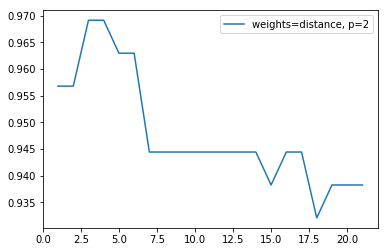

In [120]:
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
X_train0, X_valid, y_train0, y_valid = model_selection.train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
l_k = range(1, 22)
params = l_k
#print params
scores = [clf_knn.set_params(n_neighbors=k).fit(X_train0, y_train0).score(X_valid, y_valid) for k in params]
plt.plot(l_k, scores, label="weights=distance, p=2")
plt.legend()

k0 = params[np.argmax(scores + np.arange(len(scores)) * 1e-6)]
print k0

clf_knn.set_params(n_neighbors=k0).fit(X_train, y_train)
y_predicted = clf_knn.predict(X_test)
print metrics.confusion_matrix(y_test, y_pred=y_predicted)
print metrics.accuracy_score(y_test, y_pred=y_predicted)
print metrics.classification_report(y_true=y_test, y_pred=y_predicted)

In [74]:
clf_lreg = linear_model.LogisticRegression(penalty='l2', C=1e-5)
clf_lreg.fit(X_train, y_train)
y_predicted = clf_lreg.predict(X_test)
print metrics.confusion_matrix(y_test, y_pred=y_predicted)
print metrics.accuracy_score(y_test, y_pred=y_predicted)
print metrics.classification_report(y_true=y_test, y_pred=y_predicted)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 16  1  0  0  0  0  0  0]
 [ 0  1  0 12  0  2  0  3  0  0]
 [ 0  0  0  0 18  0  0  1  1  0]
 [ 0  0  0  0  1 17  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  1  0  1  0  0  1  1 13  0]
 [ 0  0  0  2  0  2  0  1  0 13]]
0.894444444444
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.90      1.00      0.95        19
          2       1.00      0.94      0.97        17
          3       0.75      0.67      0.71        18
          4       0.95      0.90      0.92        20
          5       0.81      0.94      0.87        18
          6       0.95      1.00      0.97        18
          7       0.76      1.00      0.86        19
          8       0.93      0.76      0.84        17
          9       1.00      0.72      0.84        18

avg / total       0.90      0.89      0.89       180



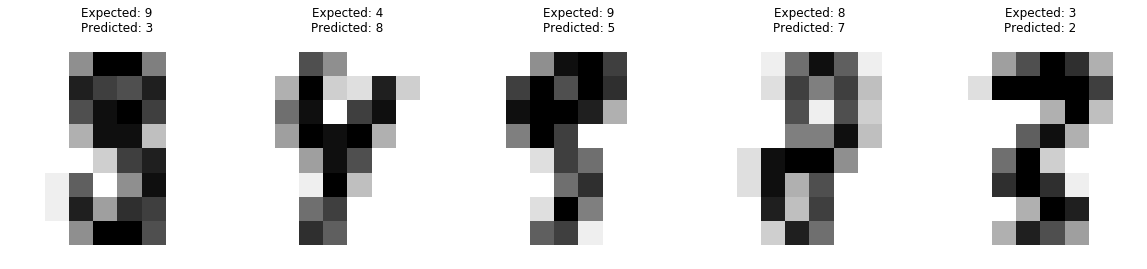

In [79]:
ix = np.where(y_predicted != y_test)[0]
plot_images(digits_test[ix[:5]], y_test[ix[:5]], y_predicted[ix[:5]])

## SVM

__Exercise__
Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.

__Warning__ the classes are ordered, do not leave out the last 10%, you would be testing on only one class.

__Hint__ You can use the decision_function method on a grid to get intuitions.

In [136]:
from sklearn import svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

ix = np.where(np.isin(y, [1, 2]))[0]
X = X[ix, :2]
y = y[ix]
print X.shape
print set(y)


(100, 2)
set([1, 2])


In [180]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

In [169]:
clf = svm.SVC(probability=True)

In [171]:
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted
print y_test
print predicted
print metrics.confusion_matrix(y_true=y_test, y_pred=predicted)
print metrics.classification_report(y_true=y_test, y_pred=predicted)

[1 1 2 1 2 1 2 1 2 1]
[1 1 2 2 1 1 2 1 2 1]
[[5 1]
 [1 3]]
             precision    recall  f1-score   support

          1       0.83      0.83      0.83         6
          2       0.75      0.75      0.75         4

avg / total       0.80      0.80      0.80        10




SVM Exercise

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.

0.744444444444
0.777777777778
0.711111111111


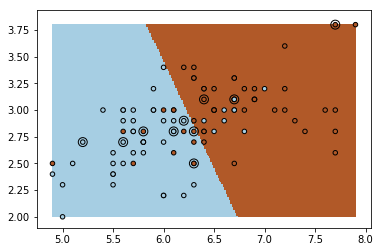

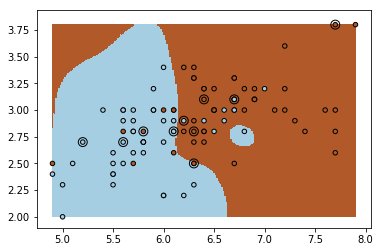

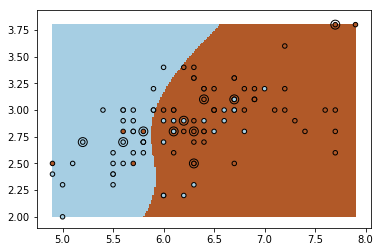

In [206]:
# %load /Users/mshevelev/Downloads/aduenko_ml/sklearn/plot_iris_exercise.py
"""
================================
SVM Exercise
================================

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
"""
print(__doc__)


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]


# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
#     plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
#                 linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

#     plt.title(kernel)
    print clf.score(X_train, y_train)
plt.show()


In [199]:
clf.decision_function([[1,2]])

array([-140.241768])

### K-fold CV

In [247]:
svc = svm.SVC(C=0.1, kernel='linear')

In [277]:
from sklearn import datasets, svm
digits = datasets.load_iris()
X_digits = digits.data
y_digits = digits.target

K = 3
X_folds = np.array_split(X_digits, K)
y_folds = np.array_split(y_digits, K)

scores = list()
for k in range(K):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    svc.fit(X_train, y_train)
    predicted = svc.predict(X_test)
    scores.append(svc.score(X_test, y_test))
    
print scores


[0.0, 0.0, 0.0]


In [294]:
%%time 
from sklearn import model_selection
kfold = model_selection.StratifiedKFold(n_splits=K, shuffle=True)
scores = []
for ix_train, ix_test in kfold.split(X_digits, y_digits):
    score = svc.fit(X_digits[ix_train], y_digits[ix_train]).score(X_digits[ix_test], y_digits[ix_test])
    scores.append(score)

print scores
    
#[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
#         for train, test in model_selection.k_fol.split(X_digits)]

[0.94117647058823528, 1.0, 0.97916666666666663]
CPU times: user 2.8 ms, sys: 187 µs, total: 2.99 ms
Wall time: 2.75 ms


In [283]:
%%time 
model_selection.cross_val_score(svc, X_digits, y_digits, cv=kfold, n_jobs=3, )

CPU times: user 60.9 ms, sys: 24.4 ms, total: 85.3 ms
Wall time: 172 ms


array([ 0.94117647,  0.92156863,  1.        ])

#### Excercise

[0.09849749582637729, 0.09849749582637729, 0.09849749582637729, 0.09849749582637729, 0.09849749582637729, 0.89816360601001666, 0.93155258764607685, 0.93823038397328884, 0.93989983305509184, 0.93989983305509184]


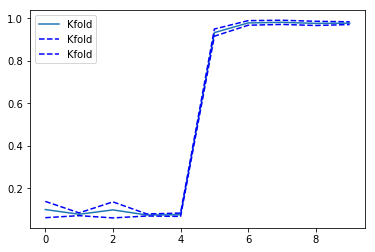

In [318]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

K = 3
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1./K, shuffle=False)
scores0 = [svc.set_params(C=C).fit(X_train, y_train).score(X_test, y_test) for C in C_s]
#plt.plot(scores0, label="train_test_split")

print scores0

kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for C in C_s:
    svc.set_params(C=C)
    score = model_selection.cross_val_score(svc, X, y, cv=kfold)
#    print score
    scores.append(score)
scores = np.array(scores)
plt.plot(scores.mean(1), label="Kfold")
plt.plot(scores.mean(1) + scores.std(1), "b--", label="Kfold")
plt.plot(scores.mean(1) - scores.std(1), "b--", label="Kfold")

#plt.plot(scores0 - scores.mean(1), label="diff")
plt.legend()


In [340]:
%%time
from sklearn.model_selection import GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1./K, shuffle=True)
kfold = model_selection.StratifiedKFold(n_splits=20, shuffle=True)

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), cv=kfold,
                   n_jobs=-1, )


clf.fit(X_train, y_train)        

print clf.best_score_                                  

print clf.best_estimator_.C                            


# Prediction performance on test set is not as good as on train set
print clf.score(X_test, y_test) 

0.984140233723
0.00774263682681
0.978297161937
CPU times: user 655 ms, sys: 125 ms, total: 780 ms
Wall time: 6.66 s


In [341]:
import sklearn.metrics

In [342]:
sklearn.metrics.SCORERS

{'accuracy': make_scorer(accuracy_score),
 'adjusted_mutual_info_score': make_scorer(adjusted_mutual_info_score),
 'adjusted_rand_score': make_scorer(adjusted_rand_score),
 'average_precision': make_scorer(average_precision_score, needs_threshold=True),
 'completeness_score': make_scorer(completeness_score),
 'explained_variance': make_scorer(explained_variance_score),
 'f1': make_scorer(f1_score),
 'f1_macro': make_scorer(f1_score, average=macro, pos_label=None),
 'f1_micro': make_scorer(f1_score, average=micro, pos_label=None),
 'f1_samples': make_scorer(f1_score, average=samples, pos_label=None),
 'f1_weighted': make_scorer(f1_score, average=weighted, pos_label=None),
 'fowlkes_mallows_score': make_scorer(fowlkes_mallows_score),
 'homogeneity_score': make_scorer(homogeneity_score),
 'log_loss': make_scorer(log_loss, greater_is_better=False, needs_proba=True),
 'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'mean_squared_error': make_scorer(mean_sq